In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- visualize given input data
- visualize output
- noisy data identification

In [19]:
import sys
sys.path.append('..')

In [20]:
!pwd

/Users/akerke/Documents/stacked-unets/notebooks


In [21]:
import config
from src.utils import get_etci_df

In [25]:
config.train_dir

'/Users/akerke/Documents/stacked-unets/dataset/data-etci-flood/train'

In [26]:
train_df = get_etci_df(config.train_dir, "train")
test_df = get_etci_df(config.test_dir, "test")

In [27]:
test_df.shape, train_df.shape

((12348, 5), (33405, 5))

### Visualize train data

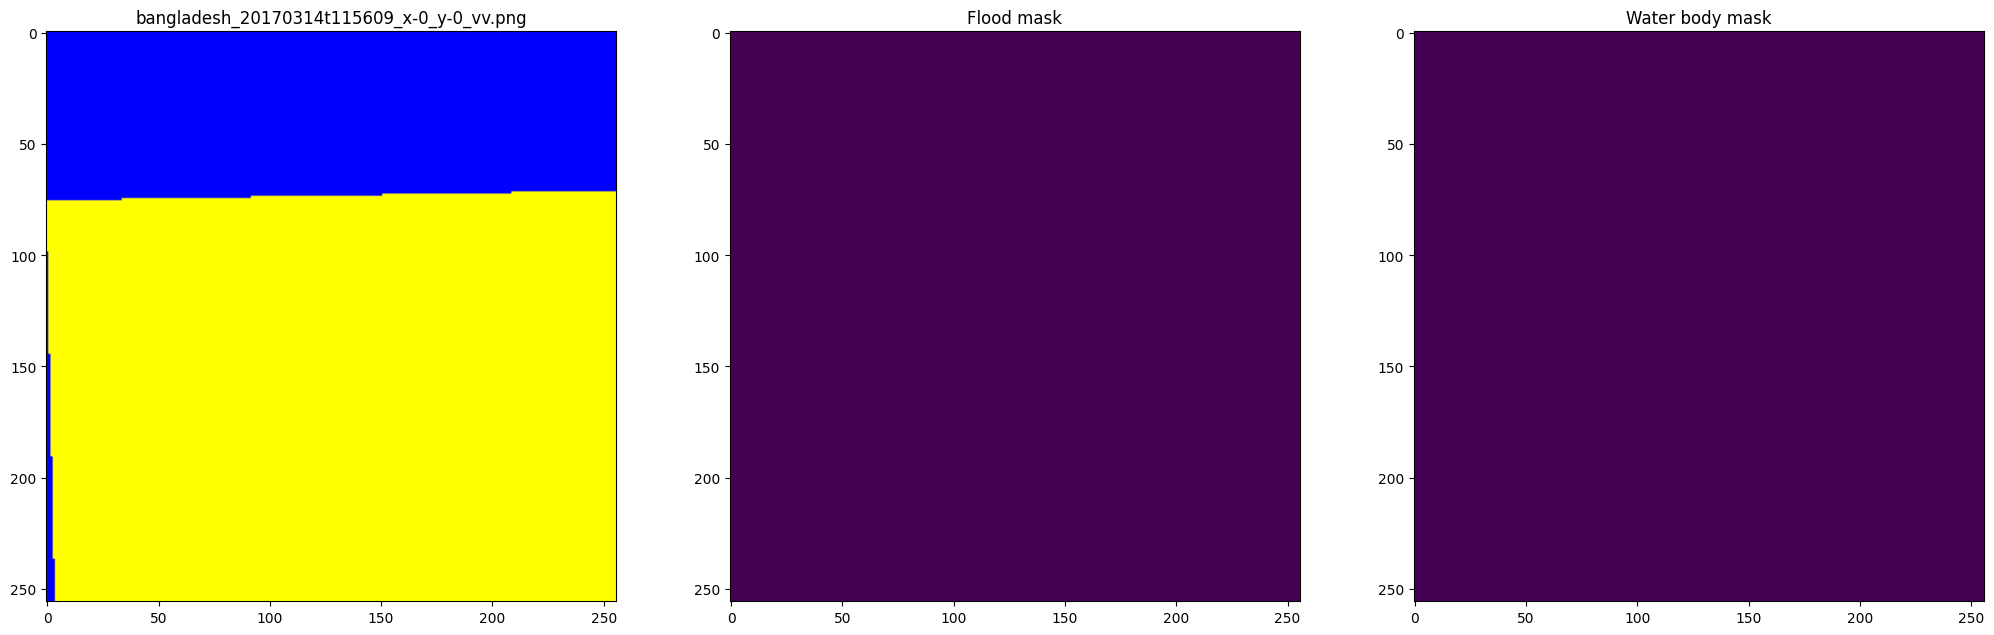

In [28]:
index = 0

utils.visualize_image_and_masks(train_df.iloc[index])

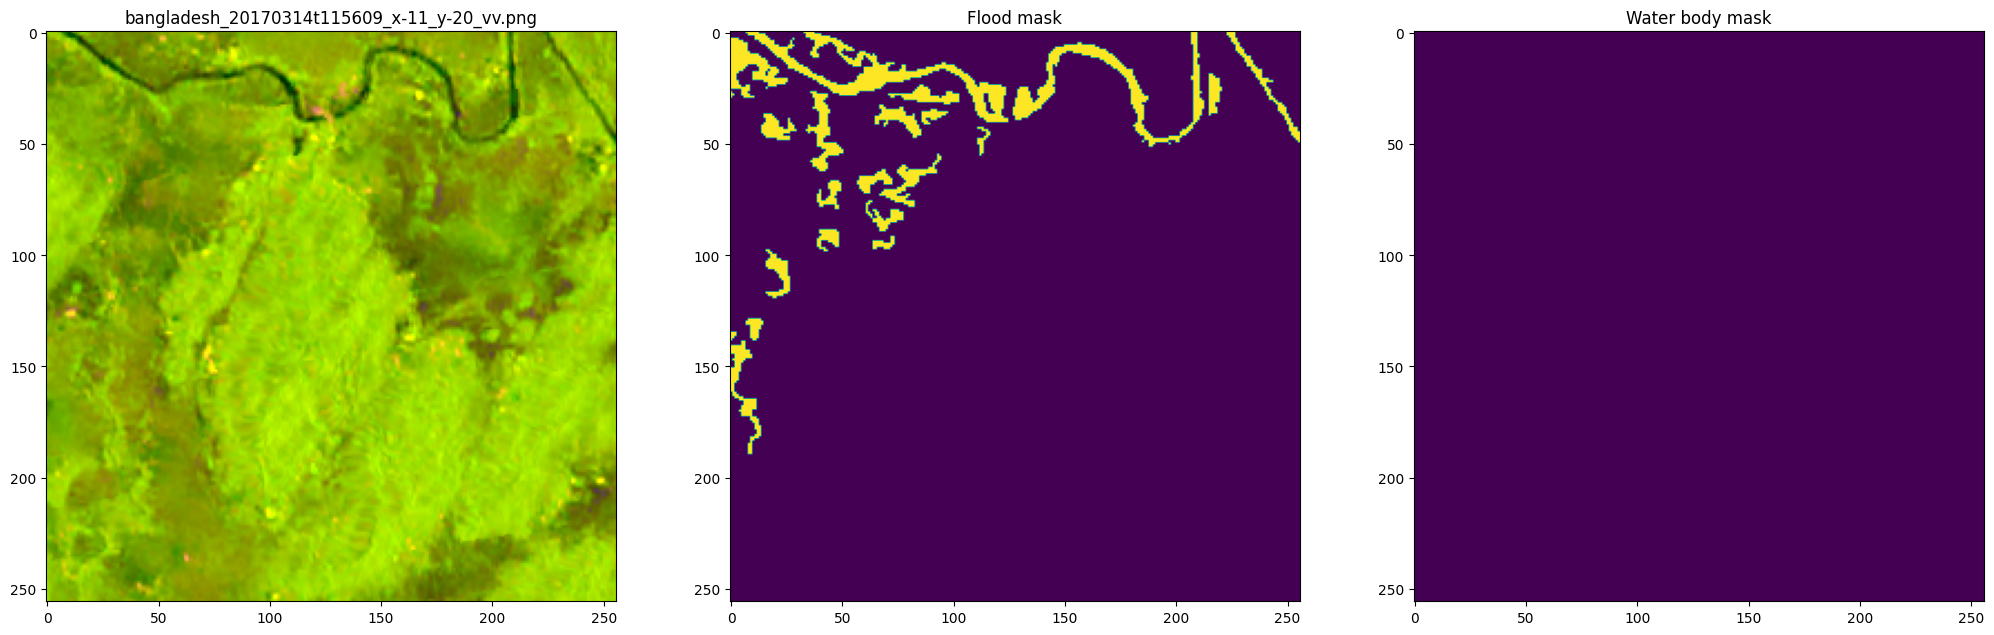

In [29]:
index = 100

utils.visualize_image_and_masks(train_df.iloc[index])

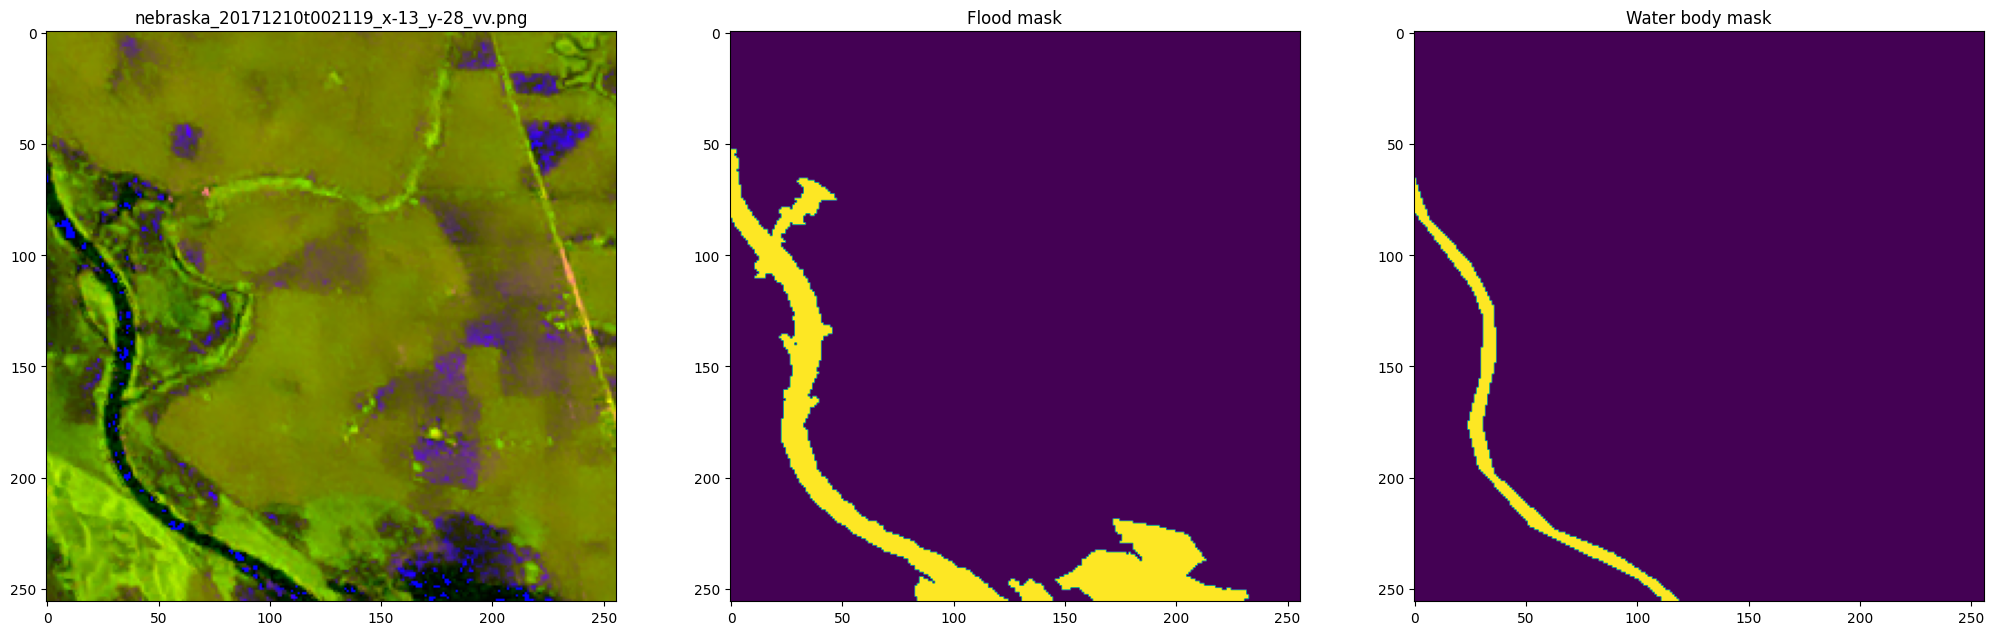

In [13]:
index = 16601

utils.visualize_image_and_masks(train_df.iloc[index])

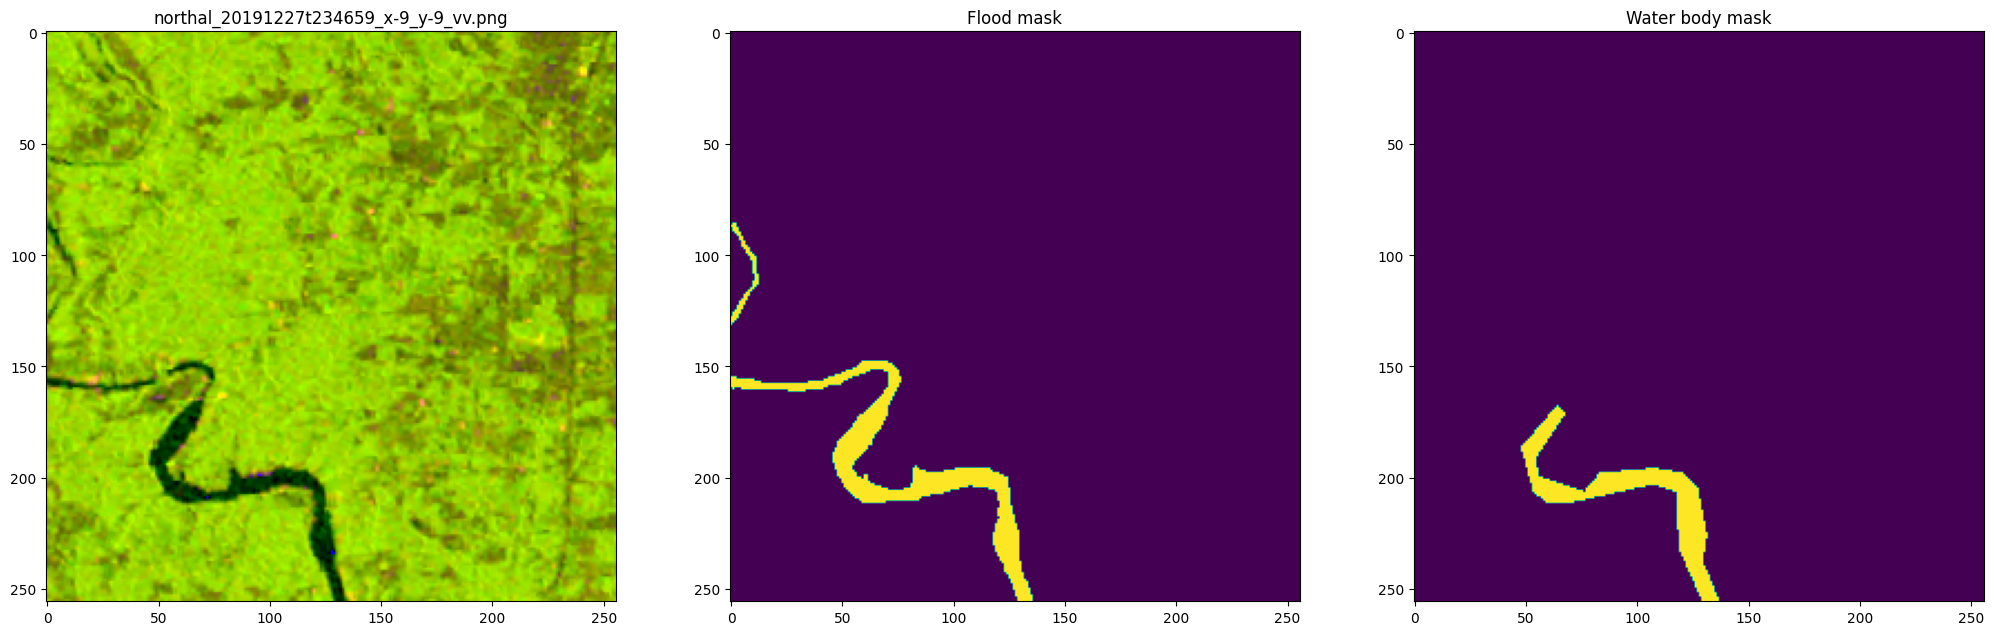

In [14]:
index = -1

utils.visualize_image_and_masks(train_df.iloc[index])

### Visualize test data

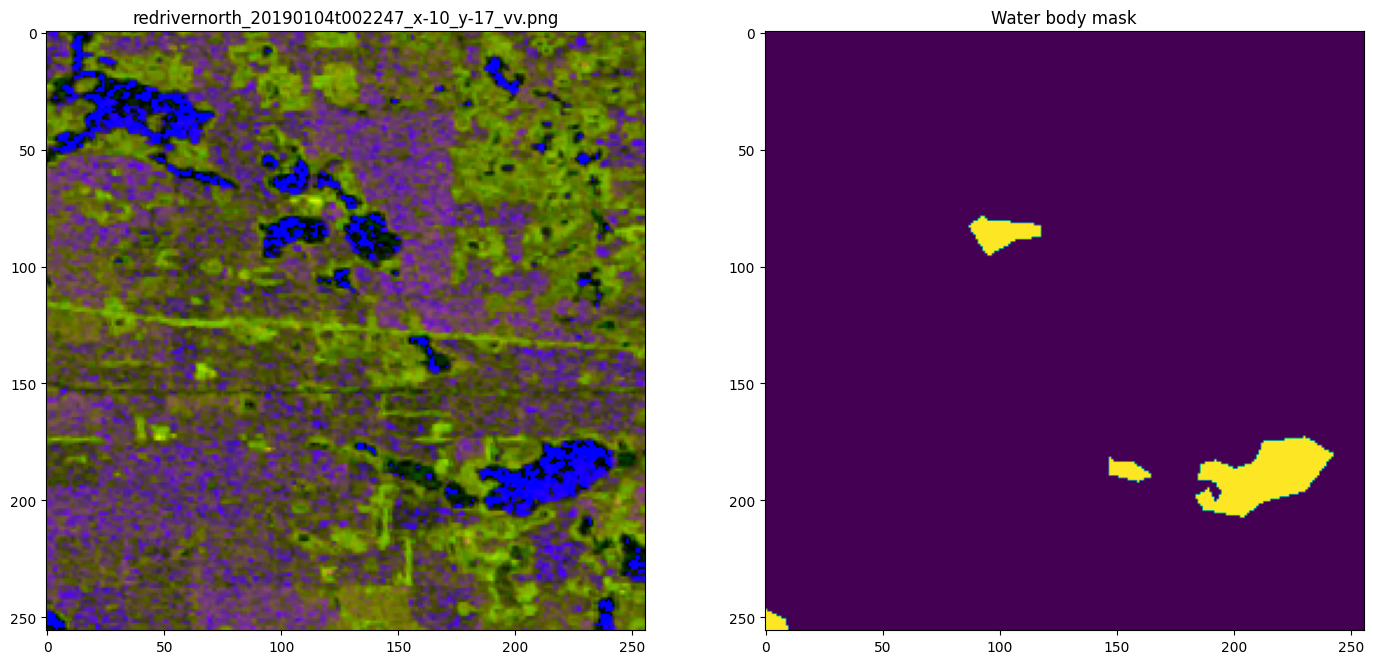

In [26]:
index = 50
utils.visualize_image_and_masks(test_df.iloc[index], figure_size=(17,10))

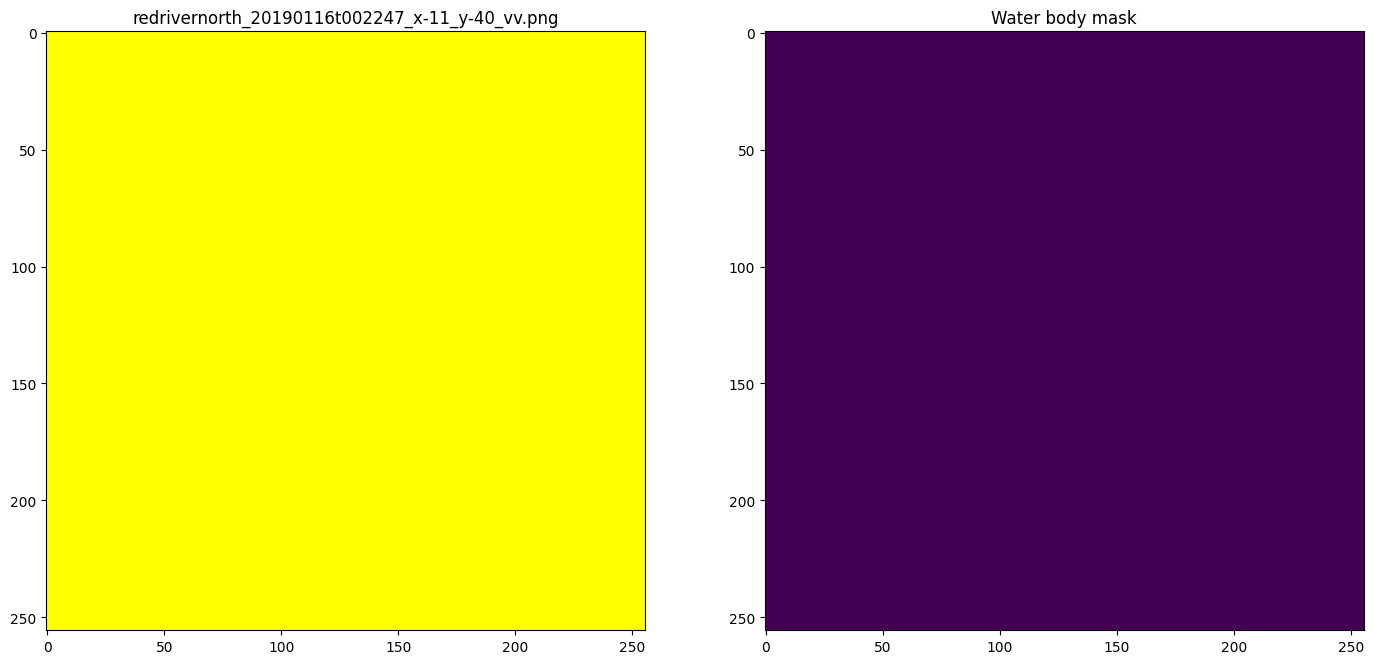

In [27]:
index = 1000
utils.visualize_image_and_masks(test_df.iloc[index], figure_size=(17,10))

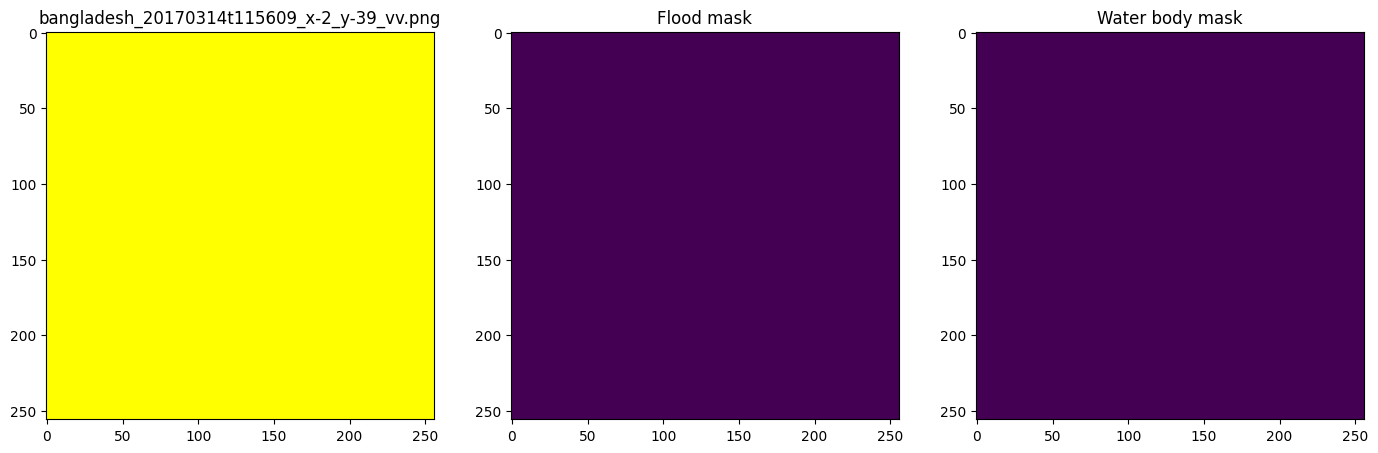

In [28]:
index = 1000
utils.visualize_image_and_masks(train_df.iloc[index], figure_size=(17,10))

#### Noisy data

some tiles at the edge of the collected SAR images contain no information and have not been removed.
These images contain all 0 or 255 values without any terrain features.

In [48]:
import cv2
import numpy as np

examples = [0,1,520,1000, 2882, 3550]

for point in examples:
    image_path = train_df.iloc[point]['vv_image_path']
    image = cv2.imread(image_path, 0) 
    image_unique_pixels = list(np.unique(image))
    print(image_unique_pixels)

[0, 255]
[0, 255]
[255]
[255]
[255]
[255]


In [40]:
noisy_points = []
for i, image_path in enumerate(train_df['vv_image_path'].tolist()):
    image = cv2.imread(image_path, 0)
    
    image_values = list(np.unique(image))

    binary_value_check = (image_values == [0,255]) or (image_values == [0]) or (image_values == [255])

    if binary_value_check is True:
        noisy_points.append(i)

In [41]:
len(noisy_points) / train_df.shape[0]

0.2508905852417303

In [49]:
print(train_df.shape)
filtered_train_df = train_df.drop(train_df.index[noisy_points])
print(filtered_train_df.shape)

(33405, 5)
(25024, 5)


In [53]:
noisy_test = []
for i, image_path in enumerate(test_df['vv_image_path'].tolist()):
    image = cv2.imread(image_path, 0)
    
    image_values = list(np.unique(image))

    binary_value_check = (image_values == [0,255]) or (image_values == [0]) or (image_values == [255])

    if binary_value_check is True:
        noisy_test.append(i)

In [55]:
print(test_df.shape)
filtered_test_df = test_df.drop(test_df.index[noisy_test])
print(filtered_test_df.shape)

(12348, 5)
(9268, 5)


In [56]:
9268 / 12348

0.7505668934240363